<a href="https://colab.research.google.com/github/mandafifah04/PCVK_Semeter6/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
import math

In [8]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/female.tiff')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


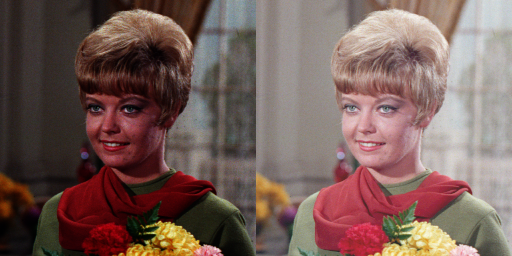

In [9]:
print(' Gamma Correction pada citra ') 
print('----------------------------------') 
try: 
 gamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
 print('Error, not a number') 


gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------------------
masukkan nilai bit-depth [1-7]: 2


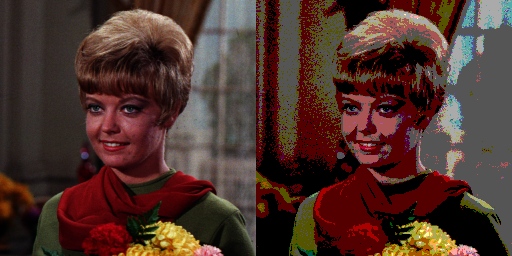

In [10]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
  depth = float(input('masukkan nilai bit-depth [1-7]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/female.tiff')
img_depth = np.zeros(original.shape, original.dtype)

# Rumus menentukan level kedalaman
level = 255 / ((2**depth) - 1)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus Bit Depth
      img_depth[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255)

final_frame = cv.hconcat((original, img_depth))
cv2_imshow(final_frame)

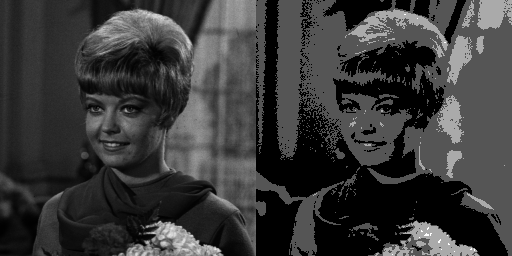

In [11]:
bit_depth=2
bit = 2**bit_depth
level = 255 / (pow(2,bit_depth)-1) 
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      # Rumus Bit Depth
      depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

      final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 5
Nilai PSNR = 27.531486742027003 dB


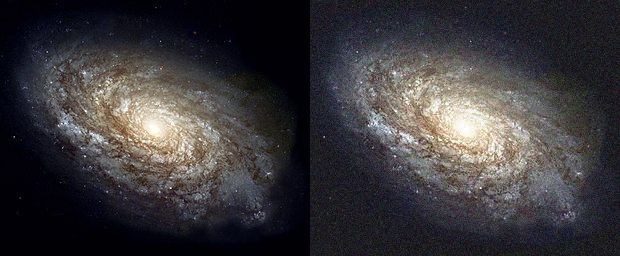

In [12]:
# Tugas 3 : Buat modul Average Denoising
# 3.1 = Jumlah Citra 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Week5/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)
noise_image = cv_img[4]
#index (array) gambar pada folder noises dimulai dari 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 30
19.712911104123542 694.687125821386


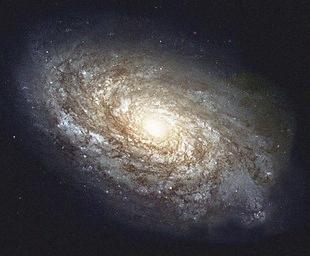

In [14]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Week5/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print(psnr, mse)
cv2_imshow(noised_image)

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 60
19.745487661804844 689.4957517874476


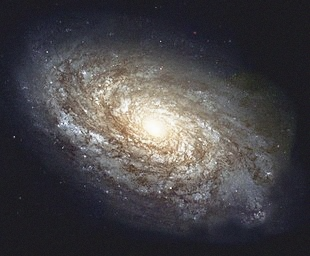

In [15]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Week5/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print(psnr, mse)
cv2_imshow(noised_image)

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 80
19.753754459349082 688.1845446311376


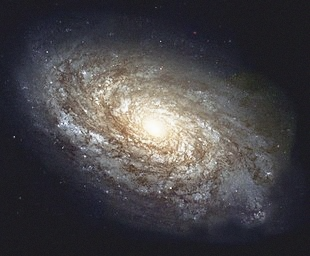

In [16]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Week5/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print(psnr, mse)
cv2_imshow(noised_image)

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 100
19.758317288501708 687.4618968229167


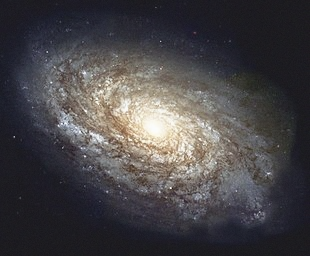

In [17]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Week5/noises/*.jpg'): 
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print(psnr, mse)
cv2_imshow(noised_image)

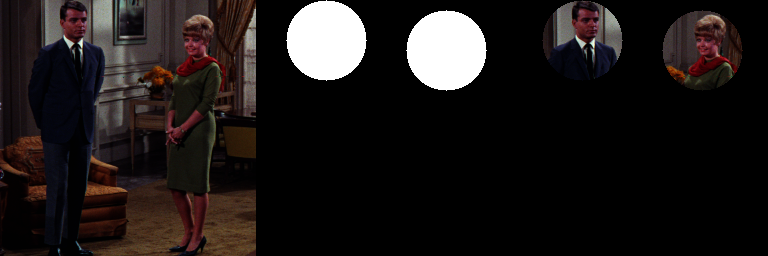

In [18]:
img_t = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t & mask

mask1 = cv.circle(mask, (190, 50), 40, (255,255,255), -1)

result = img_t & mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)



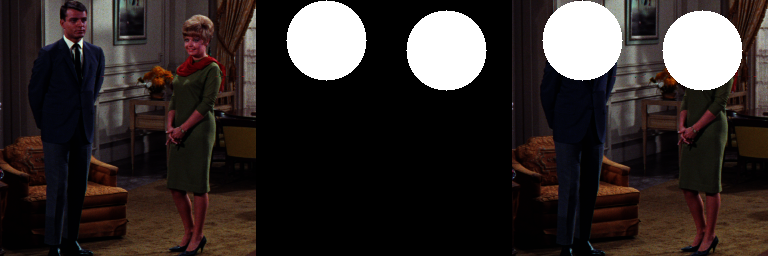

In [19]:
img_t = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t | mask  # menggunakan operator bitwise OR

mask1 = cv.circle(mask, (190, 50), 40, (255,255,255), -1)

result = img_t | mask1  # menggunakan operator bitwise OR

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

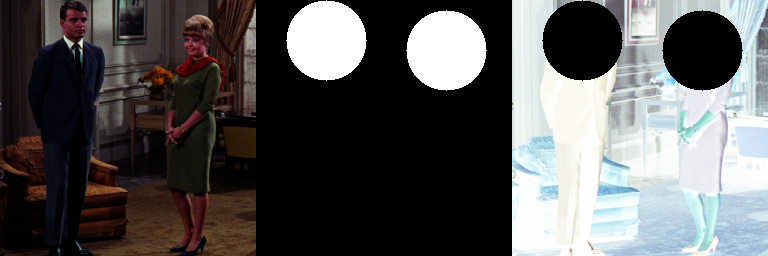

In [20]:
img_t = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = ~img_t & ~mask  # menggunakan operator bitwise NOT

mask1 = cv.circle(mask, (190, 50), 40, (255,255,255), -1)

result = ~img_t & ~mask1  # menggunakan operator bitwise NOT

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

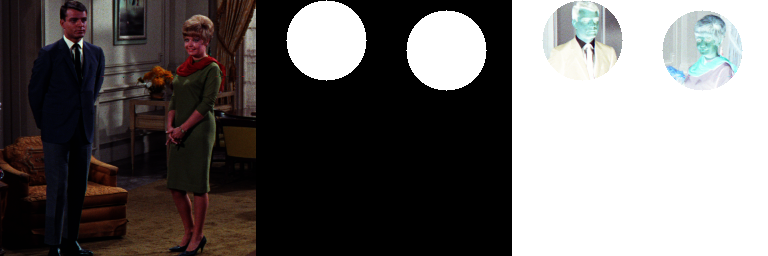

In [21]:
img_t = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)

result = ~(img_t & mask)  # menggunakan operator bitwise NAND

mask1 = cv.circle(mask, (190, 50), 40, (255, 255, 255), -1)

result = ~(img_t & mask1)  # menggunakan operator bitwise NAND

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

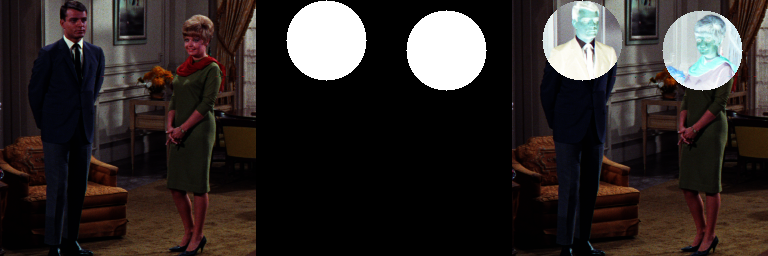

In [22]:
img_t = cv.imread('/content/drive/MyDrive/PCVK_MM/Week5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)

result = img_t ^ mask  # menggunakan operator bitwise XOR pada gambar input dan mask

mask1 = cv.circle(mask, (190, 50), 40, (255, 255, 255), -1)

result = img_t ^ mask1  # menggunakan operator bitwise XOR pada gambar input dan mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)